In [52]:
!pip3 install bokeh

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 2.5 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 146.4 kB/s eta 0:00:00a 0:00:01


In [42]:
from collections import defaultdict

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import to_rgb


import os

In [3]:
base_dir = 'D:/Mac2PC/Huang-Bacteria/KP_result/2770+样本信息 Plasmid，Resfinder，VFDB,mlst/hot map/hot 2.9'

# 23-05-28 new hot path
base_dir = '/Users/yao/Nutstore Files/Mac2PC/Huang-Bacteria/最终结果整理/耐药hot map/hot 2.9'

file_list = [file for file in os.listdir(base_dir) if file.endswith('.txt')]

fig_save_path = f'{base_dir}/fig_dir'

if not os.path.exists(fig_save_path):
    os.mkdir(fig_save_path)


In [4]:
file_list

['EUROP ARG0.txt',
 'USAARG0.txt',
 'totalARG0.txt',
 'chinaARG0.txt',
 '2.9 plasmid 1%.txt',
 'hot map VF0.txt']

In [37]:
def read_res_data(res_data: str):

    gene_list = []

    year_gene_cor_list = []
    
    num = 0
    norm_len = 0
    with open(res_data) as f:
        f.readline()
        year_list = f.readline().strip().split('\t')
        for line in f:
            
            l = line.strip().split('\t')
            
            if file == 'hot map VF rat.txt':
                l = l[1:]
            
            #print(l)
            
            if num ==0:
                norm_len = len(l)
            
            if len(l) != norm_len:
                print(f'Wrong line: {l}')
                print(len(l))
                input()
            gene = l[0]

            gene_list.append(gene)
            
            value_list = []
            for i in l[1:]:
                if i:
                    value_list.append(str(i))
                else:
                    value_list.append('0')
                    
            # if number > 1.0, change to 1.0
            
            tmp_list = []
            
            for s in value_list:
                s = float(s)
                if s <= 1:
                    tmp_list.append(s)
                else:
                    tmp_list.append(1.0)
            
            year_gene_cor_list.append(tmp_list)
            
            #year_gene_cor_list.append([float(s) for s in value_list])
            

    print(f'Gene Count: {len(gene_list):,}')
    return year_list, gene_list, year_gene_cor_list

Gene Count: 107


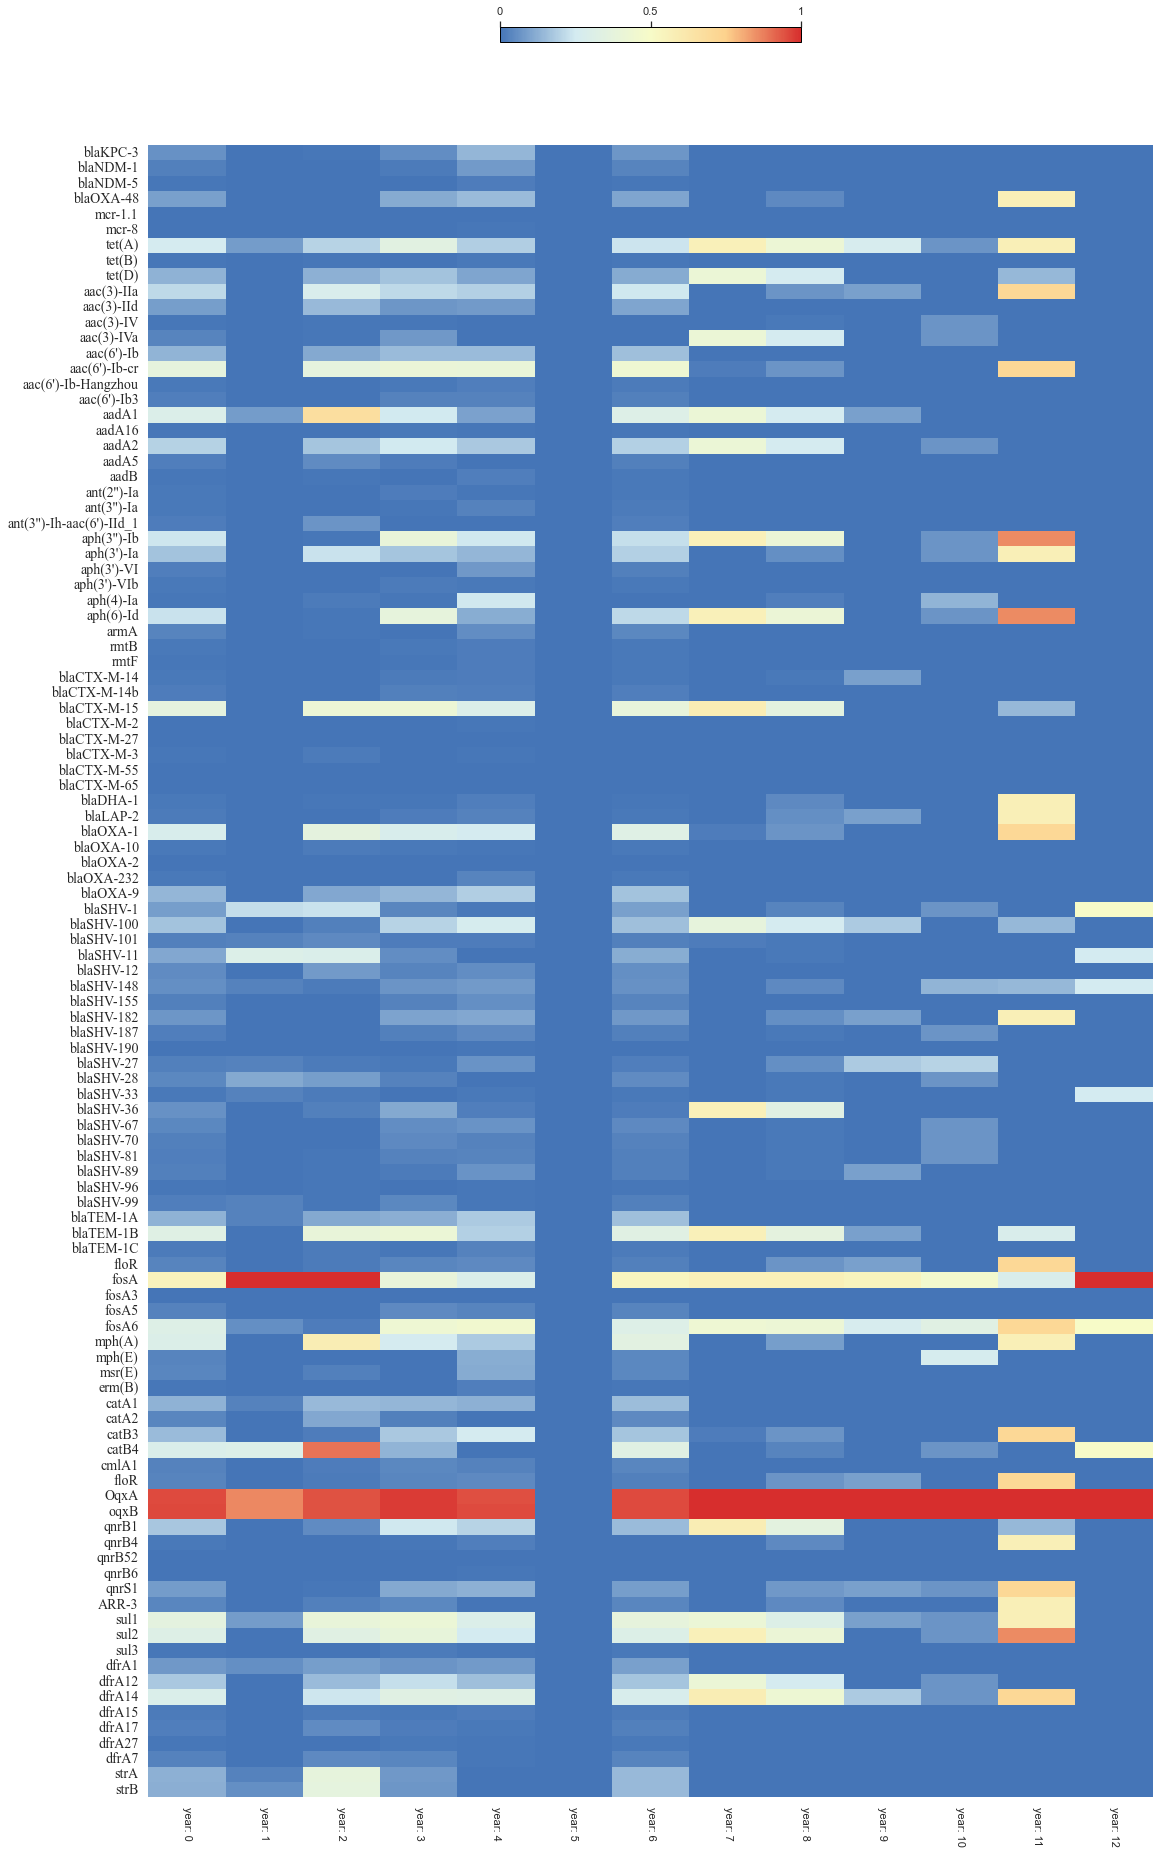

In [46]:
# figure test 

# 定义自定义颜色
#colors = [(0.0, 0.0, 1.0), (0.5, 0.5, 1.0), (1.0, 1.0, 0.0), (1.0, 0.0, 0.0)]

# 定义自定义colormap
#cmap = LinearSegmentedColormap.from_list('my_colormap', colors, N=256)

#cmap = 'tab20c'


# 定义自定义颜色
#colors = [(0.949, 0.608, 0.522), (1.0, 0.824, 0.667), (1.0, 1.0, 0.965), 
#         (0.655, 0.859, 0.945), (0.224, 0.353, 0.635)]
# 修改颜色RGB值，使得蓝色和红色变浅
#colors[0] = (0.812, 0.329, 0.231)
#colors[-1] = (0.537, 0.753, 0.918)

colors = [(69,117,183,), (212,235,241), (247,251,200),(253,210,141),(215,46,45)]

# 将颜色列表转换为Matplotlib中的颜色格式
colors = [(r/255., g/255., b/255.) for r, g, b in colors]

# 创建自定义colormap并反转
# .reversed()
cmap = LinearSegmentedColormap.from_list('my_colormap', colors, N=256)

file = file_list[0]
file_path = f'{base_dir}/{file}'

prefix = '.'.join(file.split('.')[:-1])

fig_file = f'{fig_save_path}/{prefix}.png'

_, gene_list, year_gene_cor_list = read_res_data(file_path)

year_list = [f'year: {idx}' for idx in range(len(year_gene_cor_list[0]))]

year_gene_cor_matrix = np.array(year_gene_cor_list)
plt.subplots(figsize=(18, 38))
sns.set_theme()

ax = sns.heatmap(year_gene_cor_matrix, cbar=True, cmap=cmap,
                     cbar_kws={'location': 'top', 'shrink': 0.3})

plt.xticks([i+0.5 for i in range(len(year_list))], year_list, rotation=270)
plt.yticks([i+0.5 for i in range(len(gene_list))], gene_list, rotation=0, size=14, fontfamily='Times New Roman')

colorbar = ax.collections[0].colorbar
colorbar.outline.set_color('black')
colorbar.outline.set_linewidth(1)
colorbar.ax.tick_params()

# set the ticks for colorbar
colorbar.set_ticks([0, 0.5, 1])
colorbar.set_ticklabels(['0', '0.5', '1'])


0.27058823529411763

Gene Count: 107
/Users/yao/Nutstore Files/Mac2PC/Huang-Bacteria/最终结果整理/耐药hot map/hot 2.9/fig_dir/EUROP ARG0.png saved.
Gene Count: 107
/Users/yao/Nutstore Files/Mac2PC/Huang-Bacteria/最终结果整理/耐药hot map/hot 2.9/fig_dir/USAARG0.png saved.
Gene Count: 107
/Users/yao/Nutstore Files/Mac2PC/Huang-Bacteria/最终结果整理/耐药hot map/hot 2.9/fig_dir/totalARG0.png saved.
Gene Count: 107
/Users/yao/Nutstore Files/Mac2PC/Huang-Bacteria/最终结果整理/耐药hot map/hot 2.9/fig_dir/chinaARG0.png saved.
Gene Count: 105
/Users/yao/Nutstore Files/Mac2PC/Huang-Bacteria/最终结果整理/耐药hot map/hot 2.9/fig_dir/2.9 plasmid 1%.png saved.
Gene Count: 93
/Users/yao/Nutstore Files/Mac2PC/Huang-Bacteria/最终结果整理/耐药hot map/hot 2.9/fig_dir/hot map VF0.png saved.


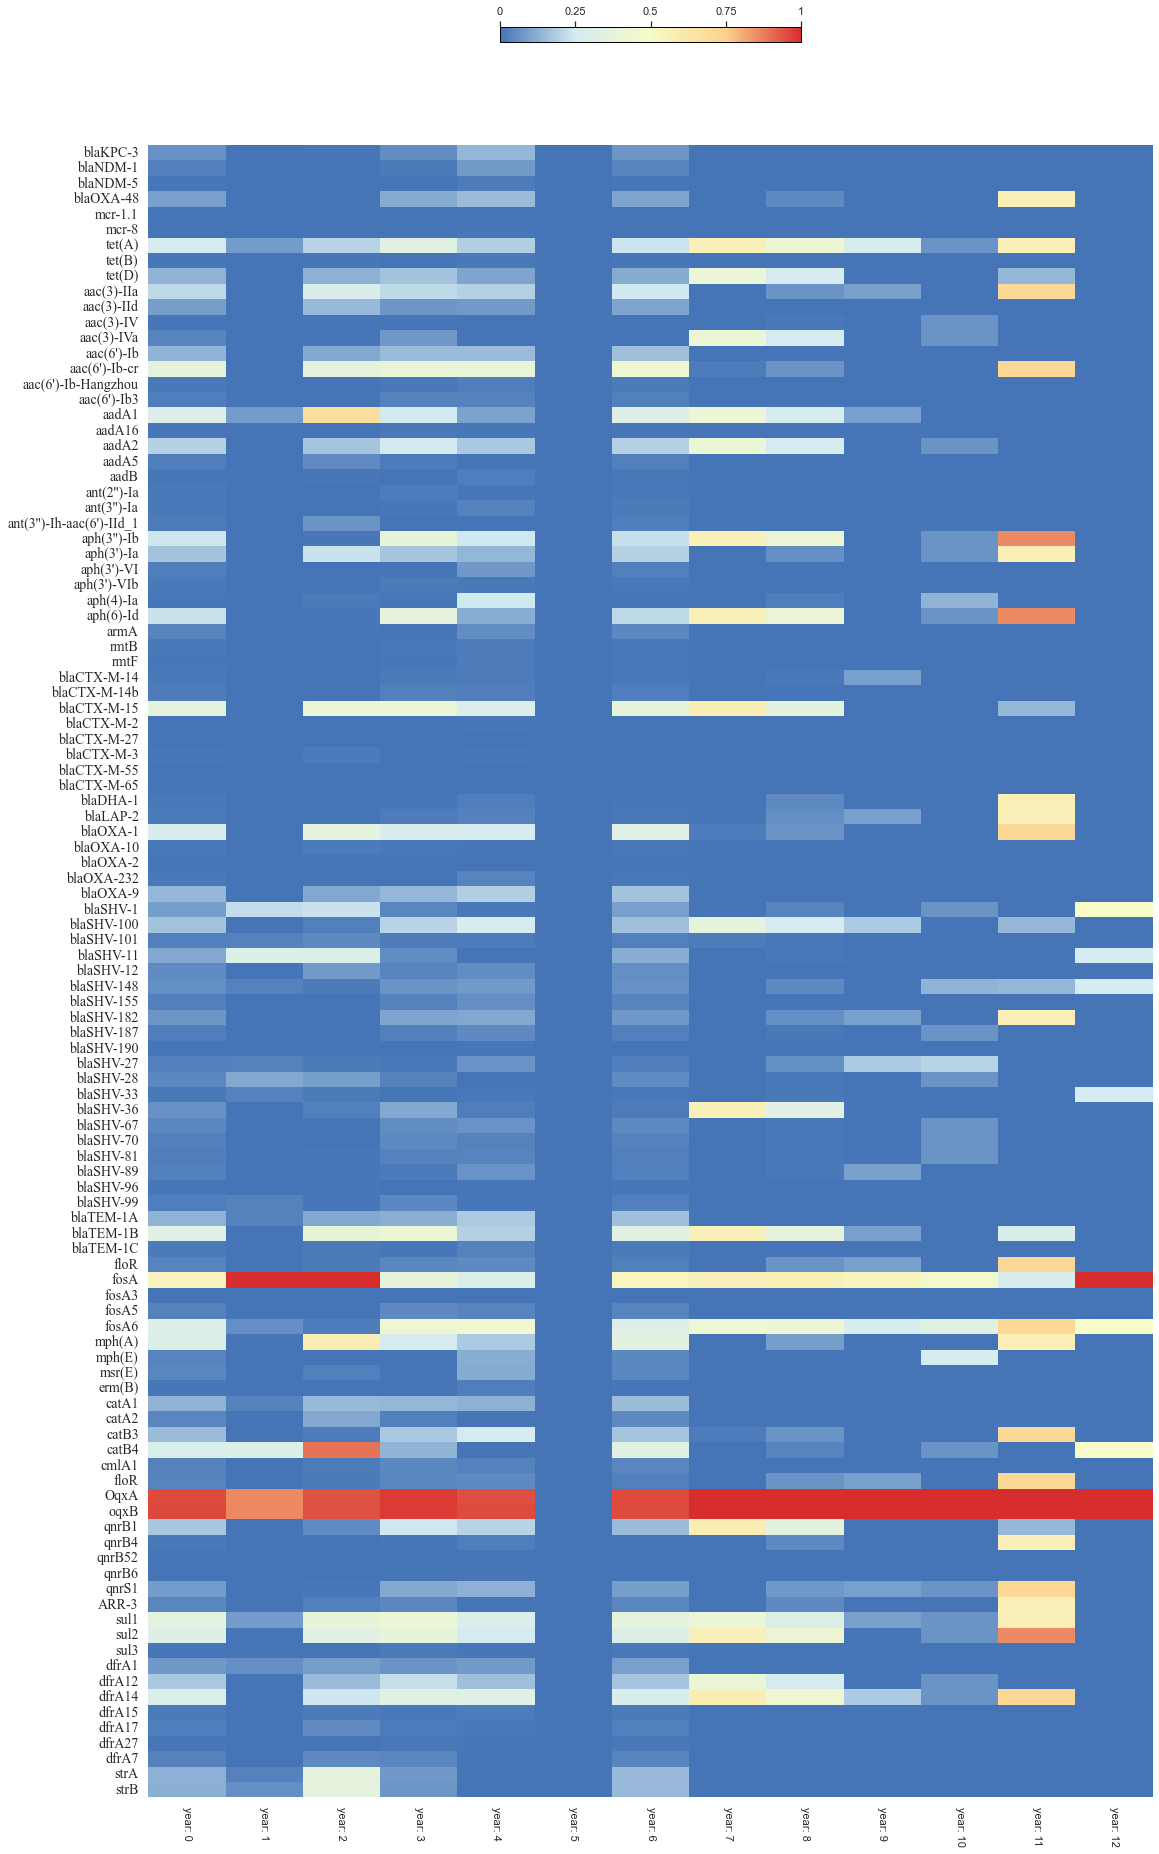

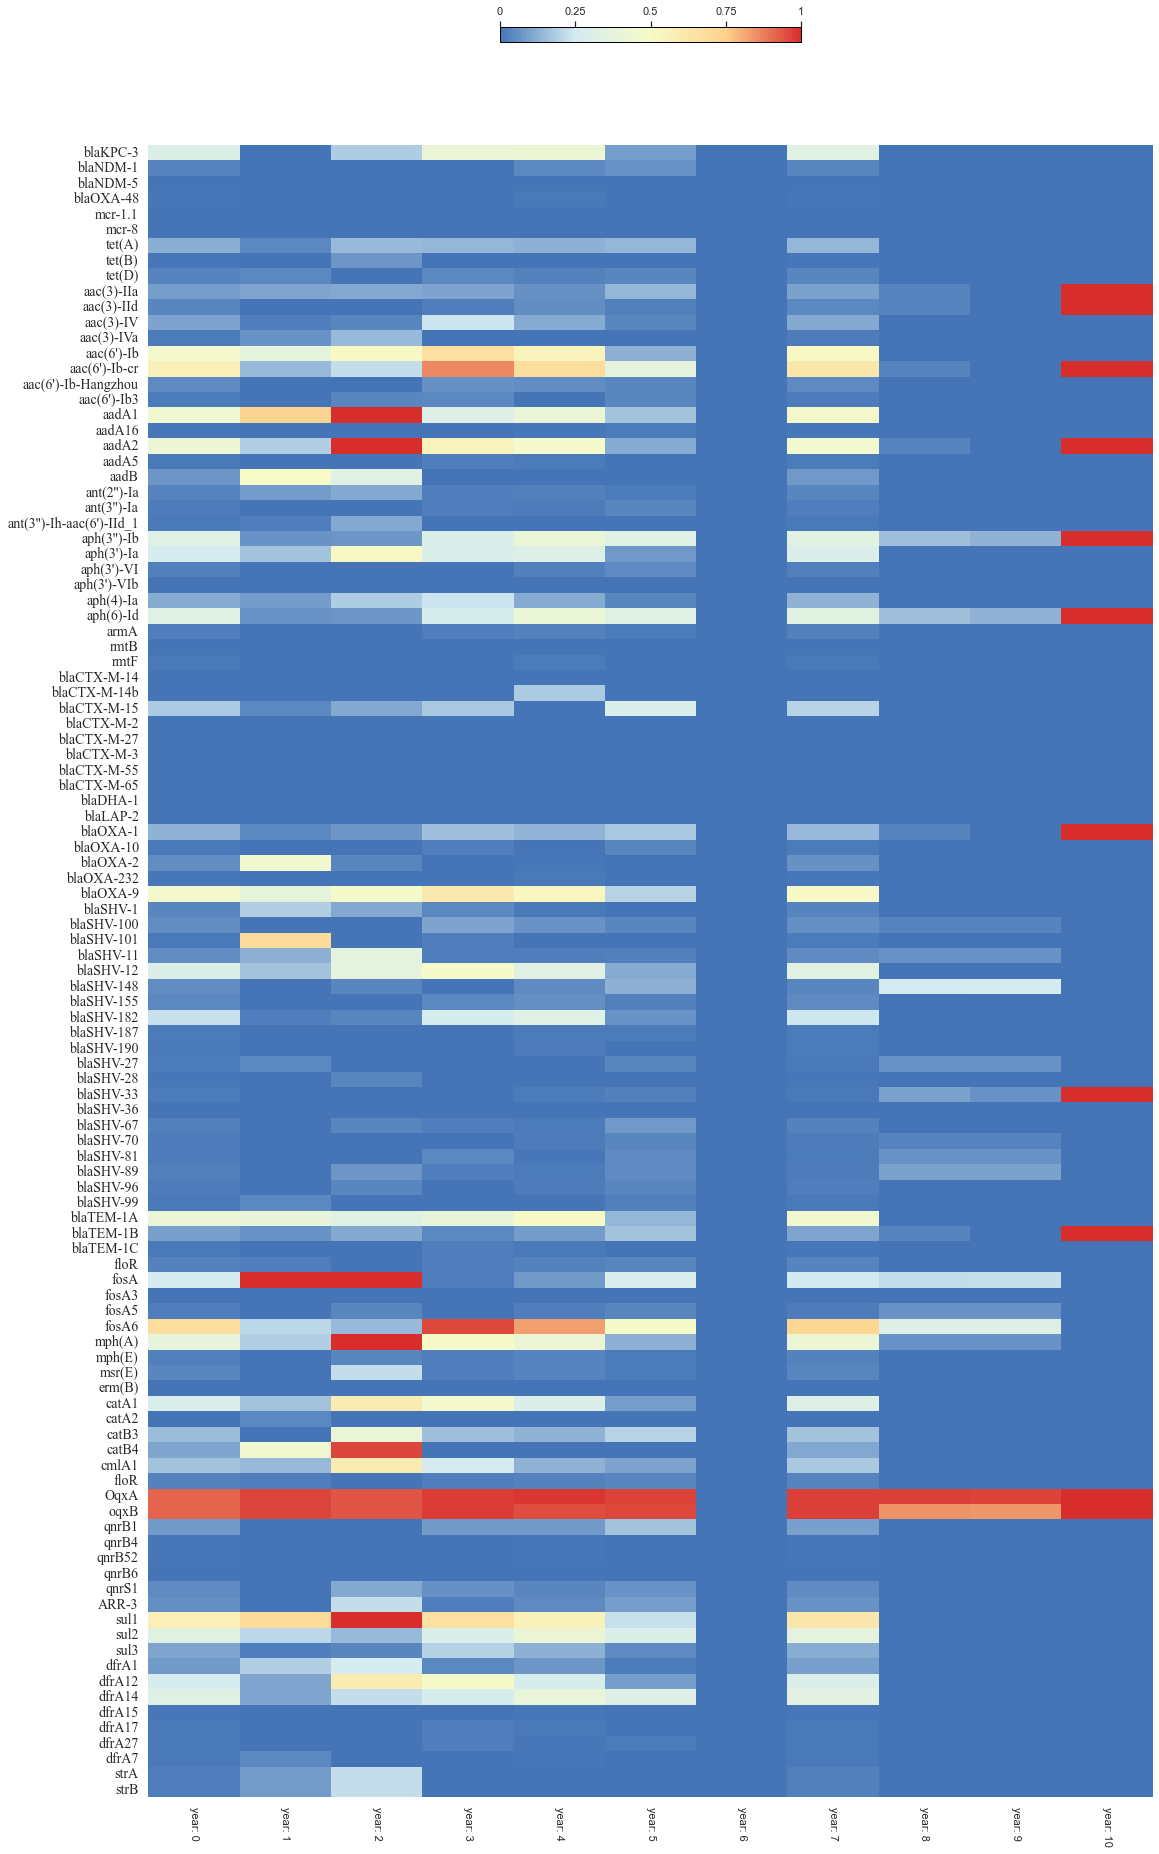

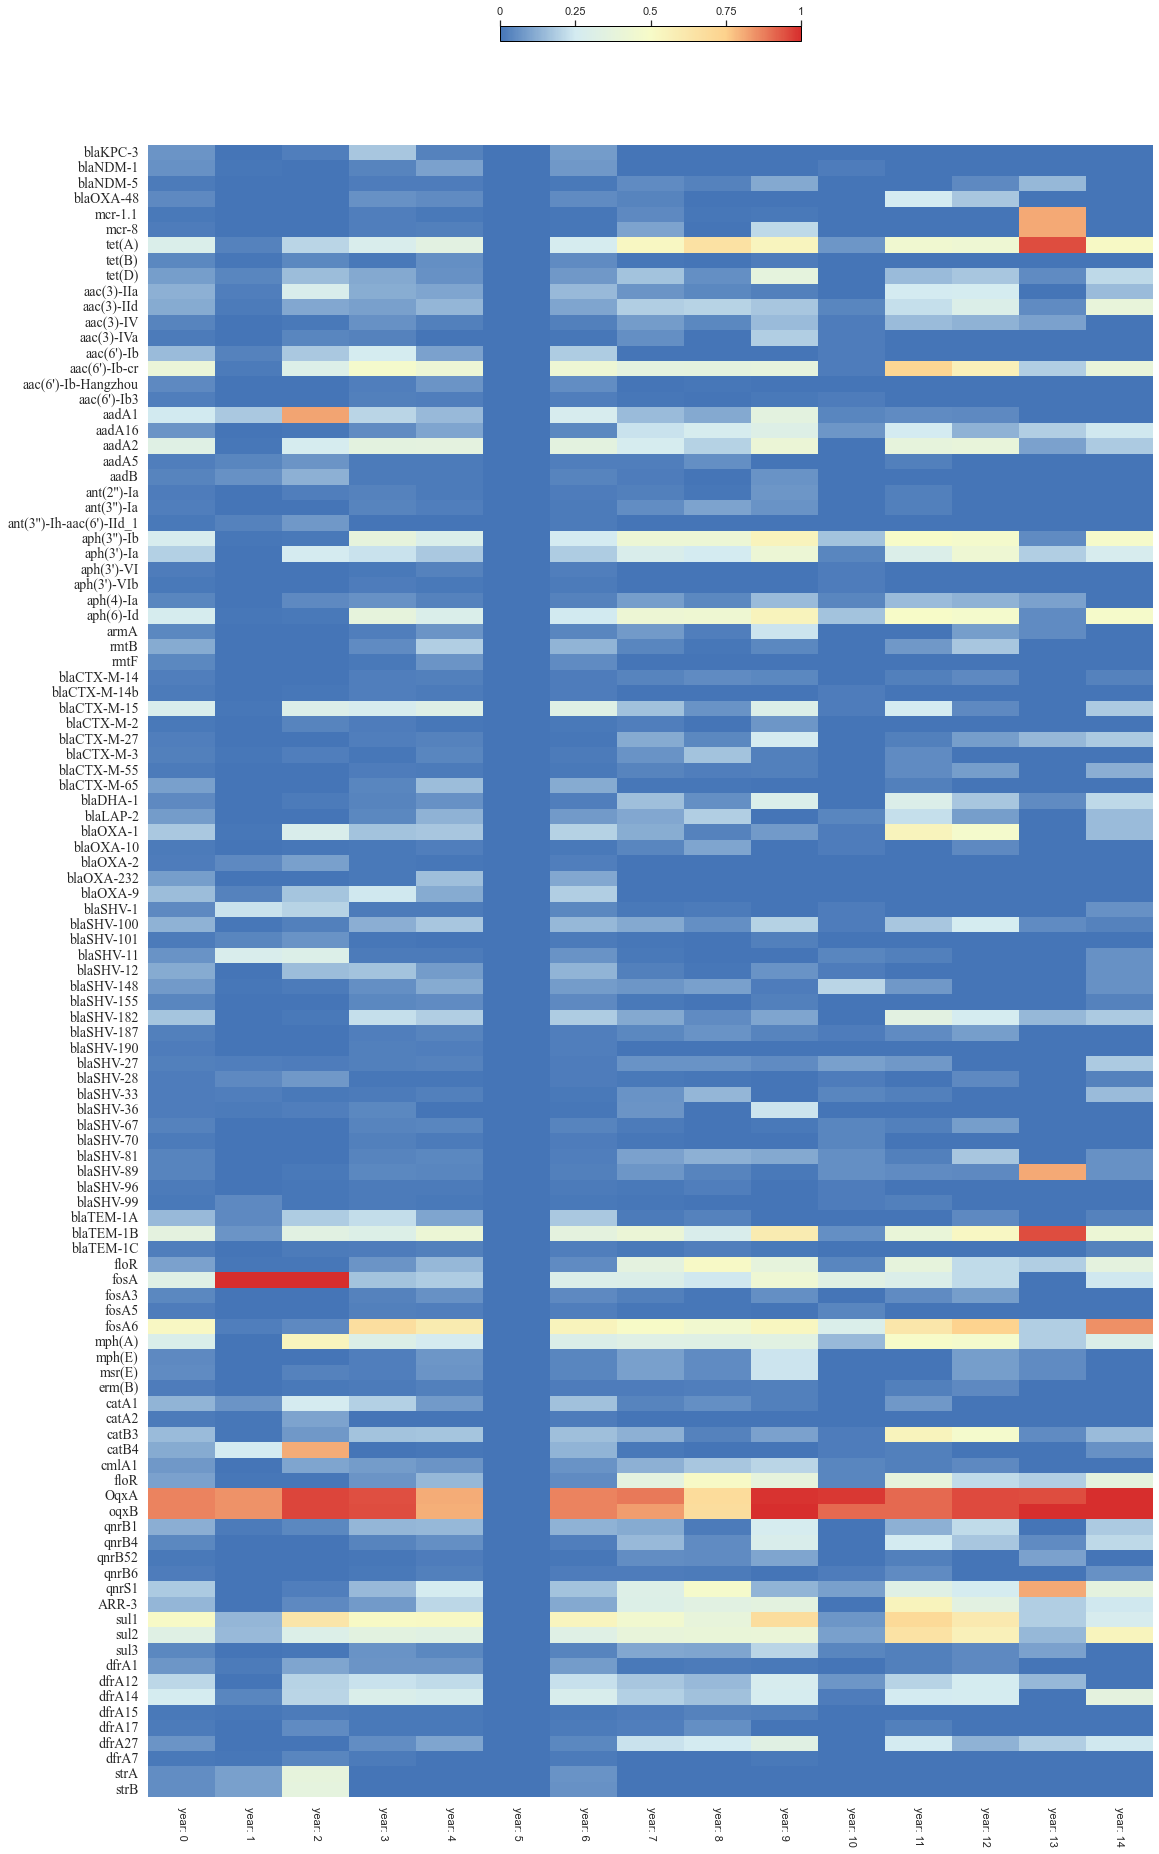

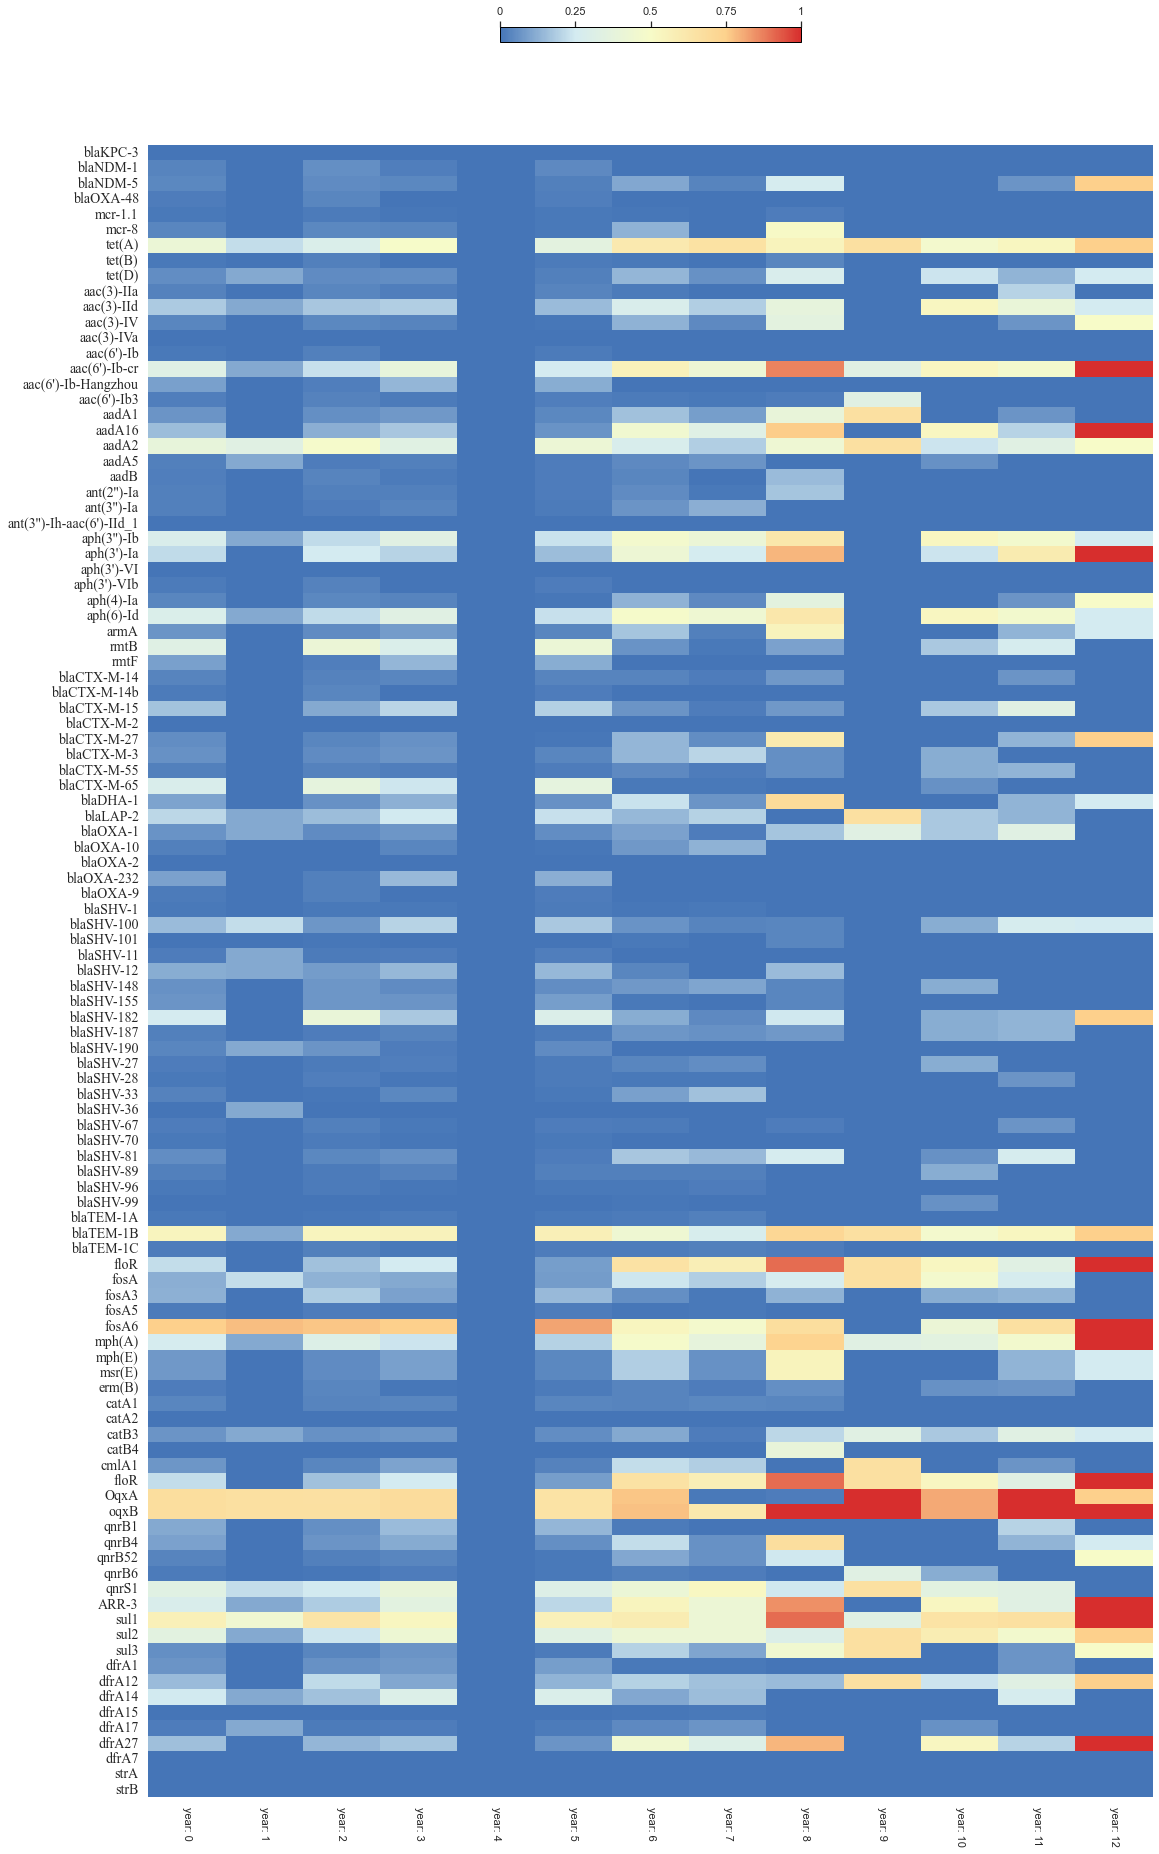

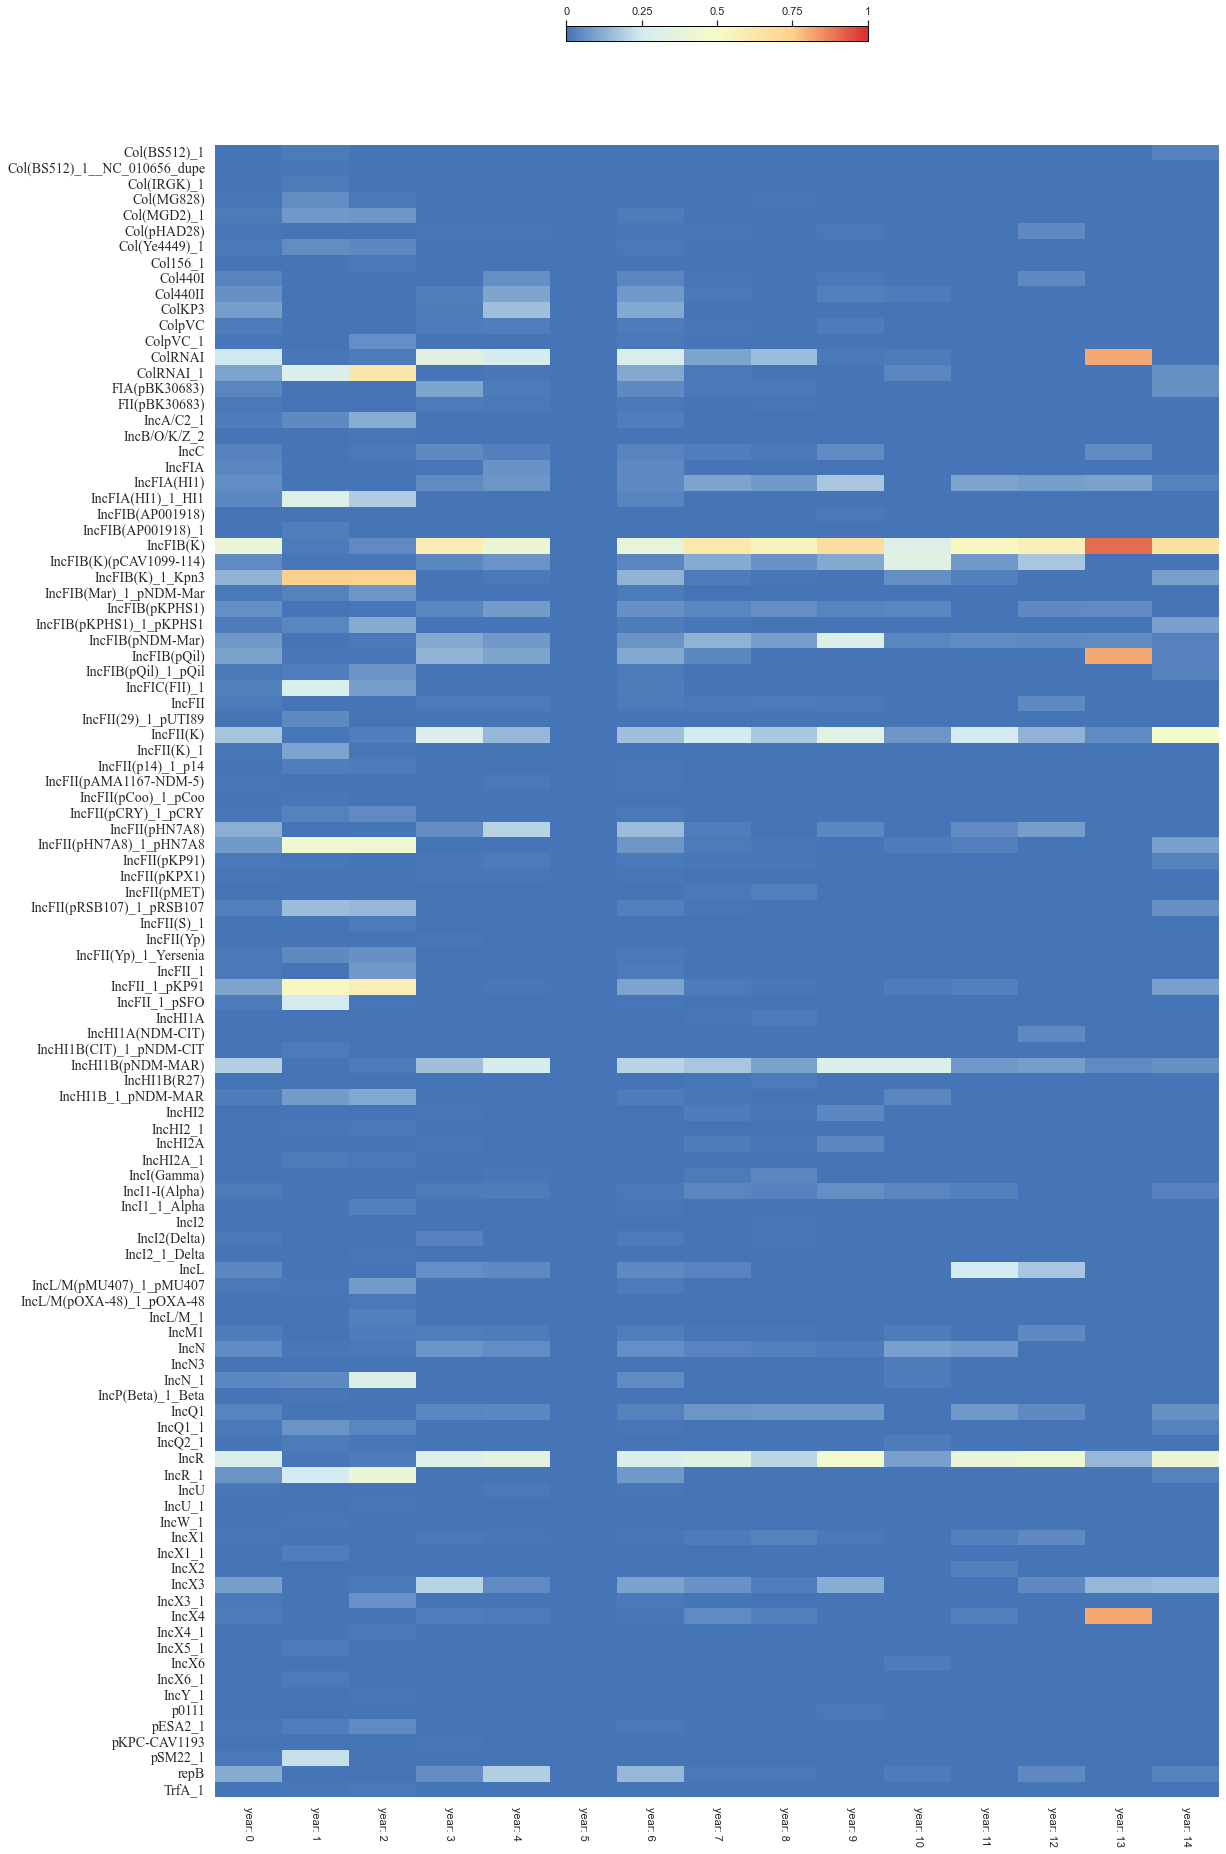

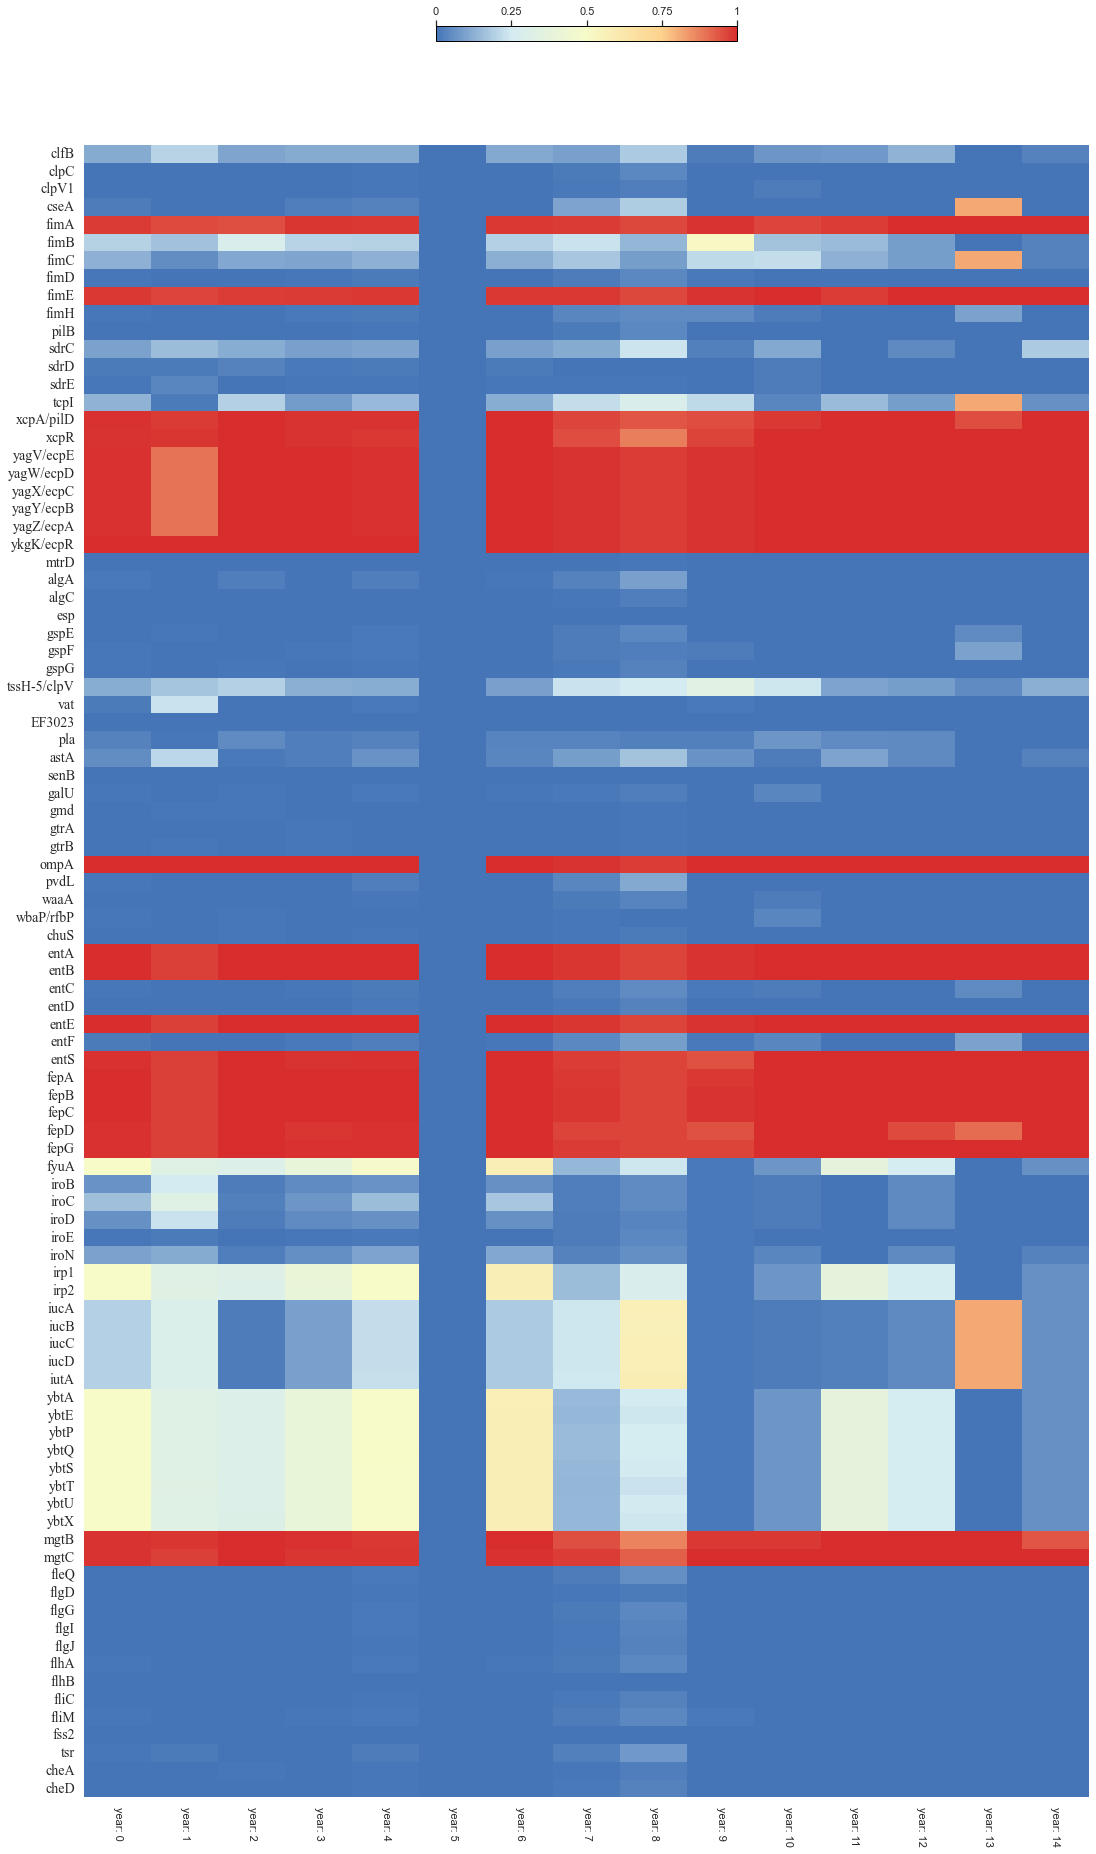

In [48]:
#cmap = 'PuBu'
#cmap = 'Purples'
colors = [(69,117,183,), (212,235,241), (247,251,200),(253,210,141),(215,46,45)]

# 将颜色列表转换为Matplotlib中的颜色格式
colors = [(r/255., g/255., b/255.) for r, g, b in colors]

# 创建自定义colormap并反转
# .reversed()
cmap = LinearSegmentedColormap.from_list('my_colormap', colors, N=256)


for file in file_list:
    file_path = f'{base_dir}/{file}'

    prefix = '.'.join(file.split('.')[:-1])

    fig_file = f'{fig_save_path}/{prefix}.png'

    _, gene_list, year_gene_cor_list = read_res_data(file_path)

    year_list = [f'year: {idx}' for idx in range(len(year_gene_cor_list[0]))]

    year_gene_cor_matrix = np.array(year_gene_cor_list)
    plt.subplots(figsize=(18, 38))
    sns.set_theme()

    ax = sns.heatmap(year_gene_cor_matrix, cbar=True, cmap=cmap,
                         cbar_kws={'location': 'top', 'shrink': 0.3},
                    vmin=0, vmax=1.0)

    plt.xticks([i+0.5 for i in range(len(year_list))], year_list, rotation=270)
    plt.yticks([i+0.5 for i in range(len(gene_list))], gene_list, rotation=0, size=14, fontfamily='Times New Roman')

    colorbar = ax.collections[0].colorbar
    colorbar.outline.set_color('black')
    colorbar.outline.set_linewidth(1)
    colorbar.ax.tick_params()
    
    # set the ticks for colorbar
    colorbar.set_ticks([0, 0.25, 0.5, 0.75, 1])
    colorbar.set_ticklabels(['0', '0.25', '0.5', '0.75', '1'])

    plt.savefig(fig_file, dpi=360, bbox_inches='tight')

    print(f'{fig_file} saved.')


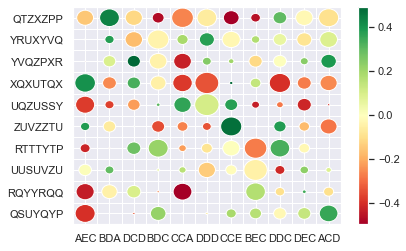

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection

N = 10
M = 11
ylabels = ["".join(np.random.choice(list("PQRSTUVXYZ"), size=7)) for _ in range(N)]
xlabels = ["".join(np.random.choice(list("ABCDE"), size=3)) for _ in range(M)]

x, y = np.meshgrid(np.arange(M), np.arange(N))
s = np.random.randint(0, 180, size=(N,M))
c = np.random.rand(N, M)-0.5

fig, ax = plt.subplots()

R = s/s.max()/2
circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
col = PatchCollection(circles, array=c.flatten(), cmap="RdYlGn")
ax.add_collection(col)

ax.set(xticks=np.arange(M), yticks=np.arange(N),
       xticklabels=xlabels, yticklabels=ylabels)
ax.set_xticks(np.arange(M+1)-0.5, minor=True)
ax.set_yticks(np.arange(N+1)-0.5, minor=True)
ax.grid(which='minor')

fig.colorbar(col)
plt.show()